In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
VERBOSE = False
PUBLISH = True
if not PUBLISH:
    %matplotlib widget
else:
    %matplotlib inline

In [68]:
### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

In [69]:
# 出力関数登録
def outfunc(fig: Figure) -> None:
    if PUBLISH:
        display(fig)
    else:
        plt.show()
g.set_dispfunc(outfunc)

In [95]:
# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = g.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not PUBLISH else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

if PUBLISH and not VERBOSE:
    g.set_transparent_mode(True)
else:
    g.set_transparent_mode(False)


In [71]:
show_title(report_date)

# 国内ゲームハード週販レポート (2026-01-25) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 2026/1/11は2週合算だったため､データは処理上の都合､週次値に変換するため1/4と1/11に等分しています｡
* [過去の週販レポート](../index.html)

## 直近4週間のハード売り上げ／累計推移

In [72]:
df1 = g.load_hard_sales()
(out1, style1) = g.chart_units_by_date_hw(df1, begin=g.weeks_before(report_date, 3), end=report_date)
display(style1)

2月6日から[マイニンテンドーストアで先着販売](https://store-jp.nintendo.com/switch2)が始まります｡
プレイ時間や購入台数制限はありますが､
任天堂は需要と供給がバランスしたと判断したようです｡

そんな今週のSwitch2は微増の7万台でした｡
今後､7万前後で推移するとすると､商戦期以外としては非常に高い水準です｡

PS5は2週連続で1万台を割り込みました｡
セール期以外は売れない商品になってます｡

Switchが減り始めました｡今週も主力はLiteで8577台で､約半分を占めています｡
将来､Switch2 Liteが出るまではこの傾向が続くのでしょうか｡


## 週販推移

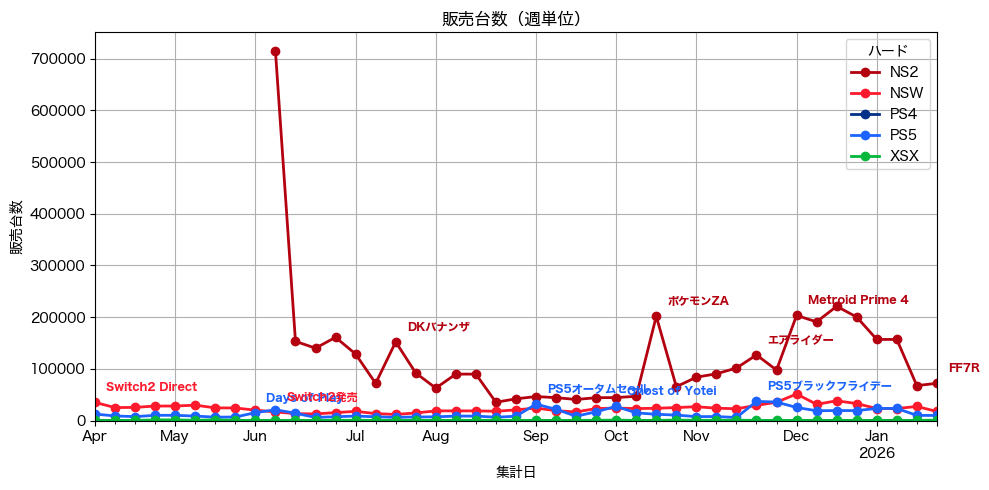

In [94]:
(weekly_fig, weekly_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, event_mask=g.EVENT_MASK_MIDDLE)


### 週販推移(拡大）

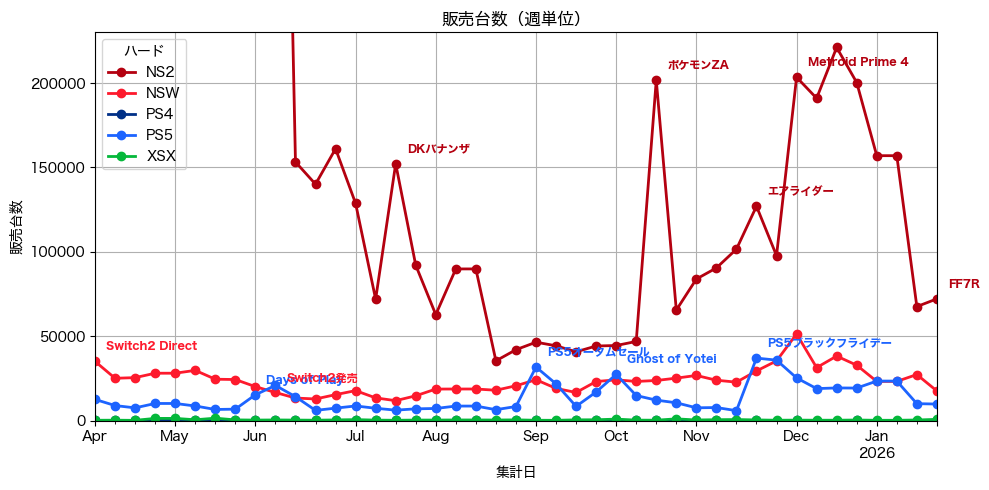

In [74]:
(weekly_big_fig, weekly_big_df) = g.plot_sales(begin=g.report_begin(report_date), end=report_date, ymax=230000, event_mask=g.EVENT_MASK_MIDDLE)


### SwitchとSwitch2:初年の年末商戦後の推移比較

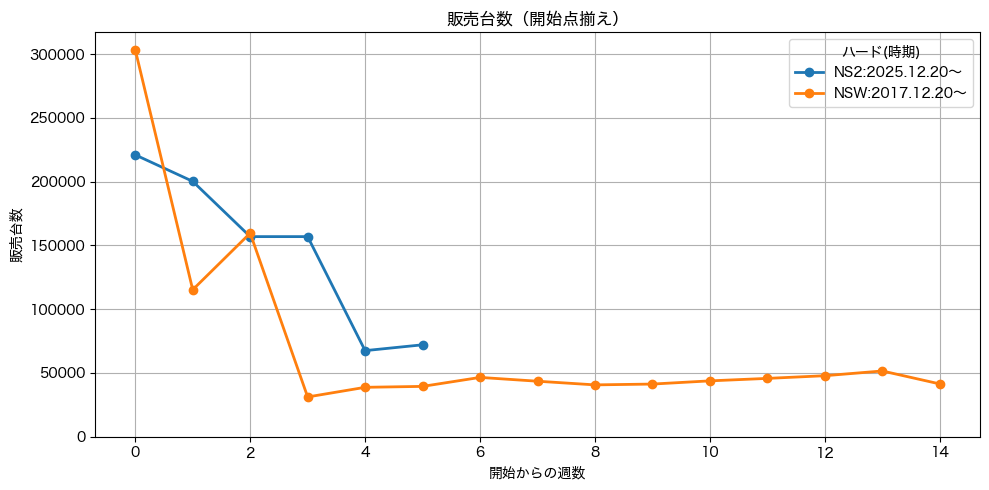

In [75]:
(pso_ns2_fig, pso_ns2_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'NSW', 'begin': datetime(2017,12,20)},
                              {'hw': 'NS2', 'begin': datetime(2025,12,20)},
                              ],
                          end = 15)


ホリデーシーズン後のSwitchとSwitch2の推移を比較するために､
Nintendo Switchの2017/12/20以降とNintendo Switch2の2025/12/20以降の週販のグラフを示します｡

商戦後に落ち込むのはSwitchもSwitch2も同じですが､
Switchは5万台未満で推移するのに比べ､Switch2は7万台前後の推移になっています｡
その差は2万台/週｡Switch2の高い需要が継続しています｡



### PS5の直近3年間の年末商戦後の推移比較

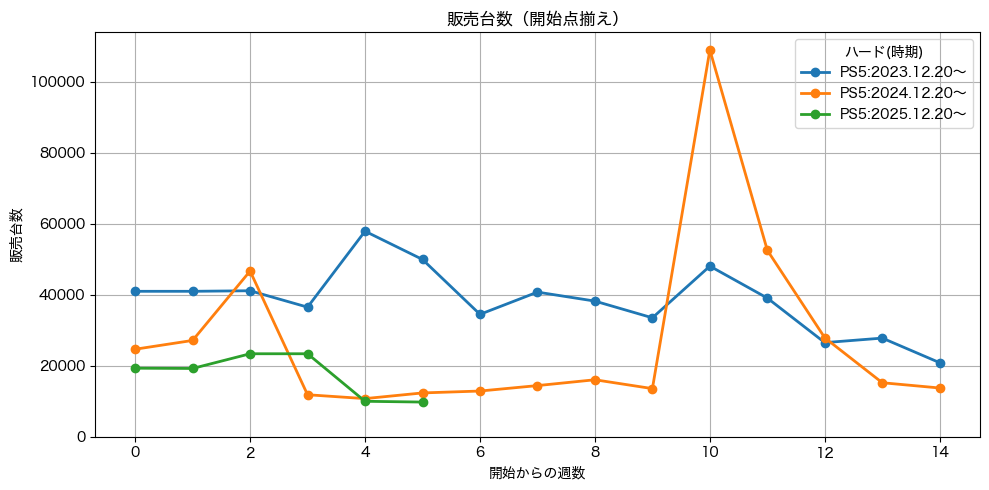

In [76]:
(psps5_fig, psps5_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'PS5', 'begin': datetime(2023,12,20)},
                              {'hw': 'PS5', 'begin': datetime(2024,12,20)},
                              {'hw': 'PS5', 'begin': datetime(2025,12,20)},
                              ],
                          end = 15)

PS5DE日本語版の値下げ効果がホリデーシーズン後も継続しているか確認するために､
PS5の2023/12/20, 2024/12/20, 2025/12/20以降の週販のグラフを示します｡

2025年は12月中の年末商戦の段階で2023年､2024年を下回っています｡
ホリデー後も昨年を下回る水準が継続しており､値下げは販売台数を増加させる事は出来ていません｡


## 月間販売推移

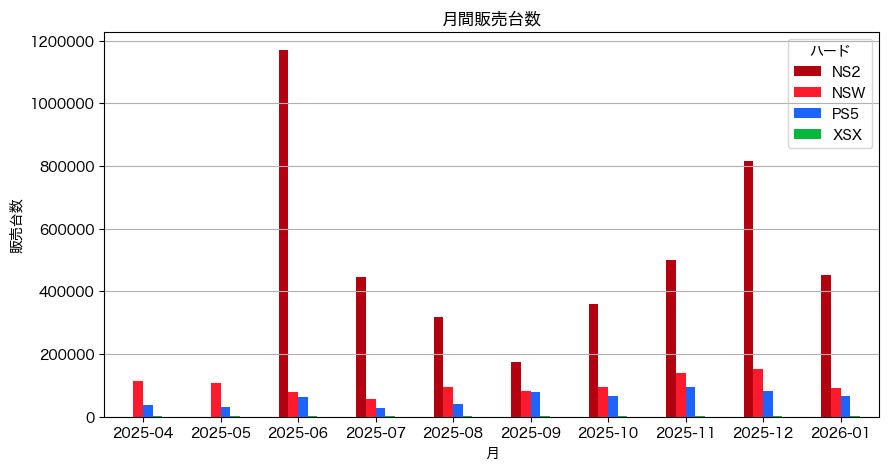

In [77]:
(mbh_fig, mbh_df) = g.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=g.report_begin(report_date), end=report_date,
                                        stacked=False)


In [78]:

month_style = g.style_sales(mbh_df.tail(1))
display(month_style)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2026-01,"453,433","91,109","66,502","1,277"


### Nintendo Switchの月間販売台数： 前々年､前年との比較

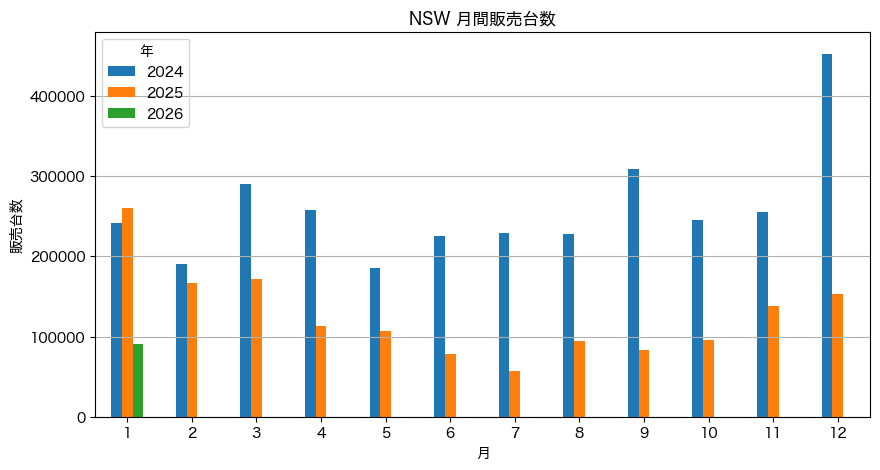

In [79]:
(my_ns_fig, my_ns_df) = g.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=g.years_ago(report_date), end=report_date)


In [80]:
if True:
    this_year = report_date.year
    my_ns_df2 = my_ns_df.drop(columns=[this_year - 2])
    my_ns_df2.loc[:, "YoY"] = my_ns_df2.loc[:,this_year] / my_ns_df2.loc[:, this_year - 1]
    my_ns_style = my_ns_df2.style.format({'YoY': '{:.1%}', this_year: '{:,.0f}', this_year - 1: '{:,.0f}'})
    
    display(my_ns_style)

year,2025,2026,YoY
month,,,
1,"260,447","91,109",35.0%
2,"167,188",0,0.0%
3,"171,921",0,0.0%
4,"113,513",0,0.0%
5,"106,506",0,0.0%
6,"78,097",0,0.0%
7,"57,532",0,0.0%
8,"94,517",0,0.0%
9,"82,946",0,0.0%


2026年1月のSwitchは10万台に届きませんでした｡前年比は35%｡大きな落ち込みです｡

ただ､昨年の4月以降にはSwitch2の影響で顕著に販売台数が低下していたので､
大きな落ち込みを示す前年比は､3月までだと思います｡

### PlayStation 5の月間販売台数： 前々年､前年との比較


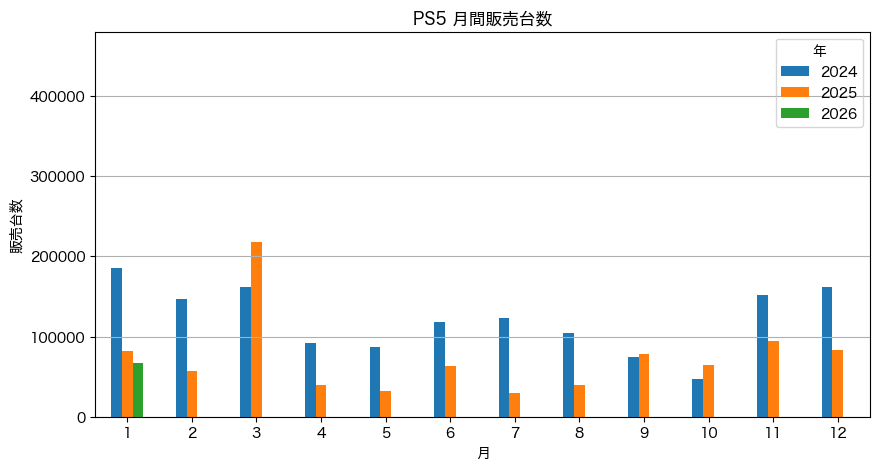

In [81]:
(my_ps5_fig, my_ps5_df) = g.plot_monthly_bar_by_year(hw="PS5", ymax=480000, 
                                        begin=g.years_ago(report_date), end=report_date)


In [82]:
if True:
    this_year = report_date.year
    my_ps5_df2 = my_ps5_df.drop(columns=[this_year - 2])
    my_ps5_df2.loc[:, "YoY"] = my_ps5_df2.loc[:,this_year] / my_ps5_df2.loc[:, this_year - 1]
    ps5_monthly_style = g.style_sales(my_ps5_df2, percent_columns=["YoY"], columns=[this_year, this_year - 1])
    display(ps5_monthly_style)

year,2025,2026,YoY
month,,,
1,"81,587","66,502",81.5%
2,"56,886",0,0.0%
3,"218,300",0,0.0%
4,"38,983",0,0.0%
5,"32,001",0,0.0%
6,"63,516",0,0.0%
7,"28,959",0,0.0%
8,"39,004",0,0.0%
9,"78,693",0,0.0%


PS5の2026年1月は前年比81.5%でした｡
値下げの効果が完全に失われています｡
早急に次のテコ入れが必要です｡


## 累計販売推移


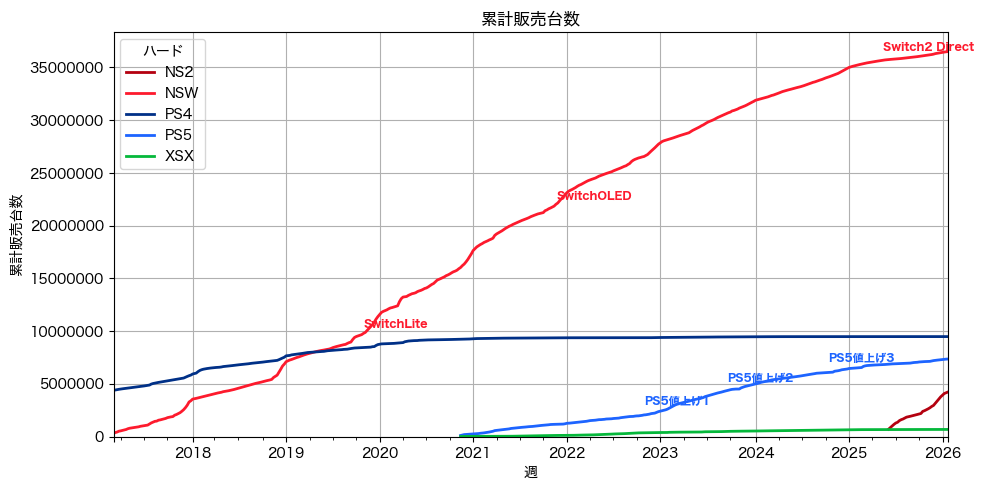

In [83]:
long_range_event_mask = g.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(cumulative_sales_fig, cumulative_sales_df) = g.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = g.EVENT_MASK_LONG)


In [84]:
cs_style = g.style_sales(cumulative_sales_df.tail(1), datetime_index=True)
display(cs_style) if VERBOSE else None

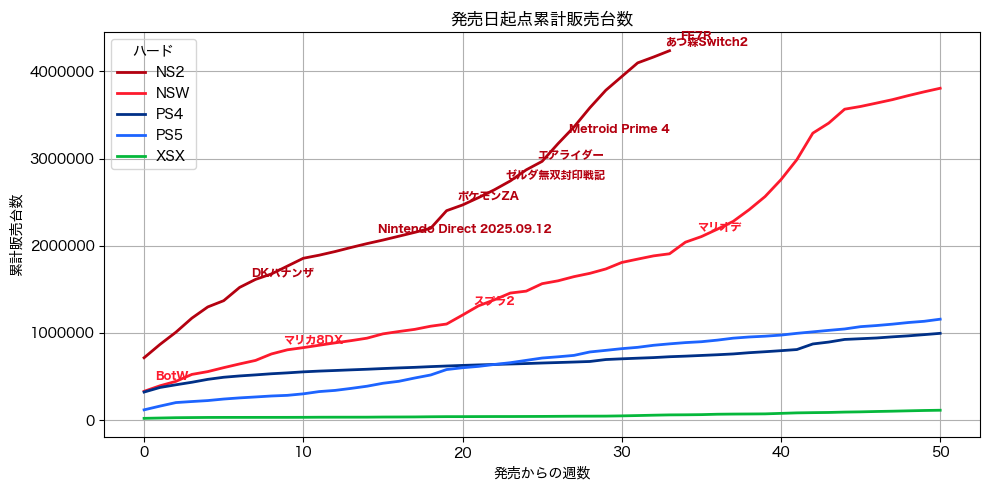

In [85]:
(csd_fig, csd_df) = g.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=50, event_mask= g.EVENT_MASK_SHORT)


Switch2は同時期のSwitchの2.2倍の普及速度を継続しています｡

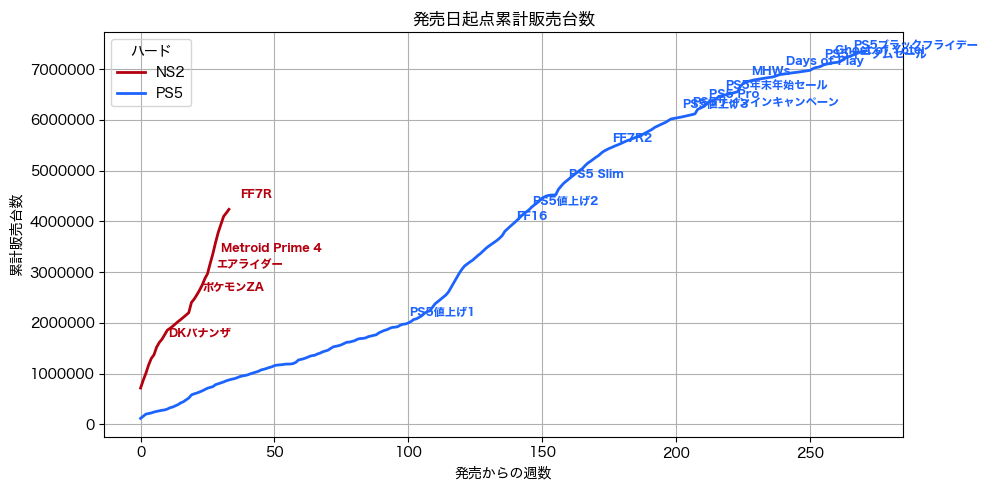

In [86]:
(csd2_fig, csd2_df) = g.plot_cumulative_sales_by_delta(hw=['NS2', 'PS5'], end=280, event_mask=g.EVENT_MASK_MIDDLE)


勢いの差を見やすくするために､Nintendo Switch2とPlayStation5だけの累計推移グラフを示します｡
Switch2はPS5に比べると垂直立ち上げと呼べるような立ち上がりをしていることが分かると思います｡

## Switch2初動状況

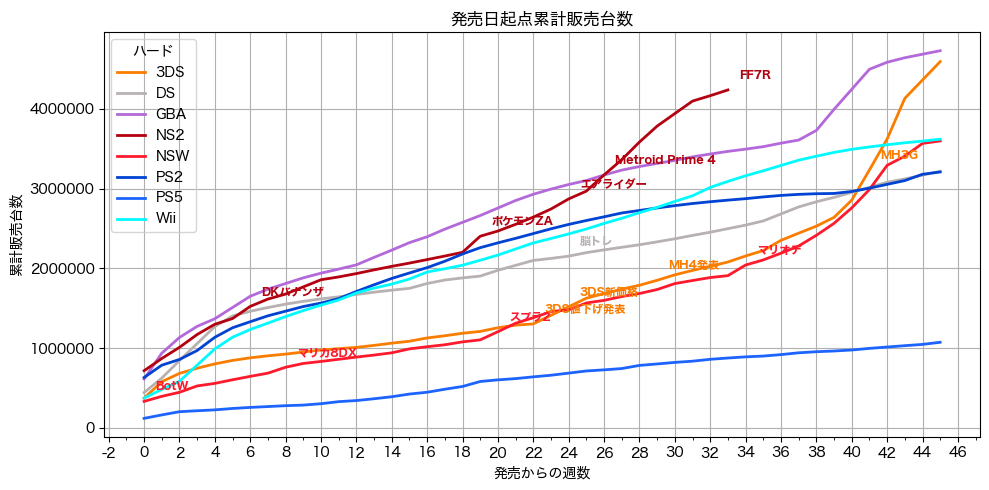

In [87]:
(csd_ns2_fig, csd_ns2_df) = g.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=45,
                                        event_mask=g.EVENT_MASK_MIDDLE)


In [88]:
df12 = csd_ns2_df.iloc[csd_ns2_df.index == 33]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)

styled_df12_unpivot = g.style_sales(df12_unpivot, columns=['販売数'], bars=['販売数'])
display(styled_df12_unpivot)

,週数,販売数
ハード,,
NS2,33,"4,237,500"
GBA,33,"3,467,042"
Wii,33,"3,090,509"
PS2,33,"2,855,375"
DS,33,"2,497,605"
3DS,33,"2,079,329"
NSW,33,"1,908,127"
PS5,33,"874,937"


Switch2が週7万のペースを維持できるなら､
第40週を超えても歴代一位を維持できる可能性が高いです｡


## 年単位の状況


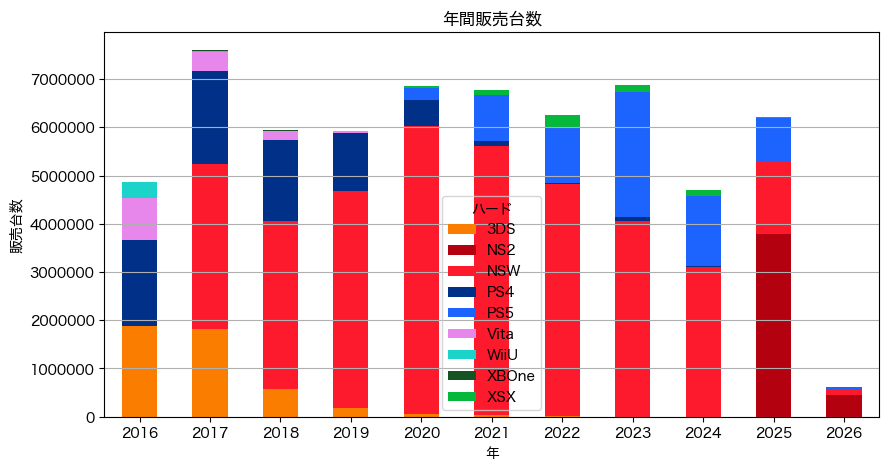

In [89]:
(yb_fig, yb_df) = g.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=g.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [90]:
yb_df["合計"] = yb_df.sum(axis=1)
yearly_style = g.style_sales(yb_df)
display(yearly_style)

hw,3DS,NS2,NSW,PS4,PS5,Vita,WiiU,XBOne,XSX,合計
year,,,,,,,,,,
2016,"1,874,457",0,0,"1,790,883",0,"865,002","336,151","8,897",0,"4,875,390"
2017,"1,827,131",0,"3,407,158","1,935,247",0,"396,207","21,817","14,664",0,"7,602,224"
2018,"566,420",0,"3,482,388","1,695,227",0,"181,728",0,"15,339",0,"5,941,102"
2019,"191,173",0,"4,493,903","1,196,153",0,"37,668",0,"8,315",0,"5,927,212"
2020,"62,761",0,"5,956,943","542,647","255,150",0,0,"3,585","31,424","6,852,510"
2021,"28,540",0,"5,579,127","104,054","968,185",0,0,0,"97,234","6,777,140"
2022,"10,664",0,"4,804,546","22,823","1,154,054",0,0,0,"269,737","6,261,824"
2023,"3,033",0,"4,062,609","73,292","2,587,468",0,0,0,"141,712","6,868,114"
2024,162,0,"3,109,103","13,728","1,454,149",0,0,0,"118,221","4,695,363"


### 年単位のメーカーシェア

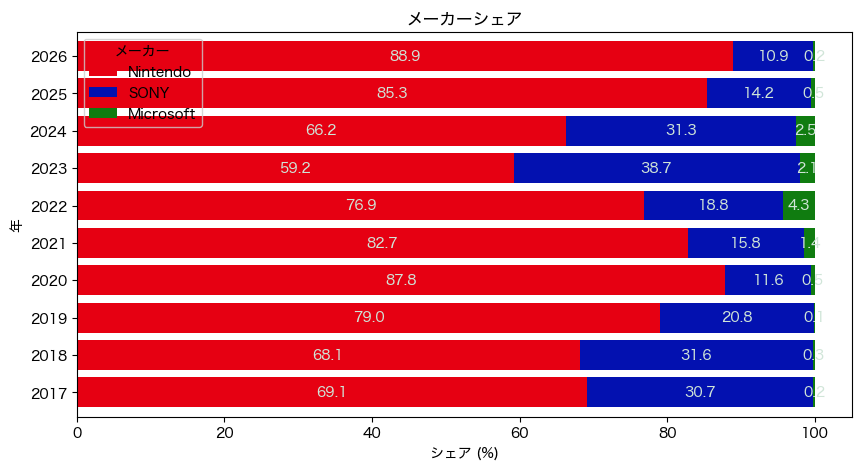

In [91]:
(msb_fig, msb_df) = g.plot_maker_share_bar(begin=datetime(2017, 1, 1))

今週も､PS5が四桁だった影響で任天堂のシェアはさらに上昇し､先週の88.8%から88.9%になりました｡

In [92]:
if VERBOSE:
    share_style = msb_df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
    share_style = share_style.background_gradient(cmap='Blues', axis=0)
    display(share_style)

In [93]:
if VERBOSE:
    (fig, df) = g.plot_maker_share_pie(begin_year=2025, end_year=2025)